The stage thermometer railed at about 6.8 K as the cryostat warmed up. A transition is visible, but its temperature is unknown.

In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-18_144450_Tc.npd/')

In [4]:
sweep = npd.sweep

In [5]:
temperature.add_temperature(measurement=sweep, cryostat='HPD')

log file is: /data/adc/cooldown_logs/2017-02-18_14-43-35.nc, last requested time is Sat Feb 18 17:56:55 2017
log file is: /data/adc/cooldown_logs/2017-02-18_14-43-35.nc, last requested time is Sat Feb 18 17:56:58 2017
log file is: /data/adc/cooldown_logs/2017-02-18_14-43-35.nc, last requested time is Sat Feb 18 17:57:01 2017
log file is: /data/adc/cooldown_logs/2017-02-18_14-43-35.nc, last requested time is Sat Feb 18 17:57:04 2017
log file is: /data/adc/cooldown_logs/2017-02-18_14-43-35.nc, last requested time is Sat Feb 18 17:57:08 2017


In [6]:
sweep.stream_arrays[0].state

StateDict({u'signal_conditioner': StateDict({u'adc_chain_gain': 0.0, u'description': u'Mark II 0.5-4 GHz', u'dac_chain_gain': -39}), 'temperature': StateDict({'load': 2.5769999027252197, 'package': 3.243654091980773})})

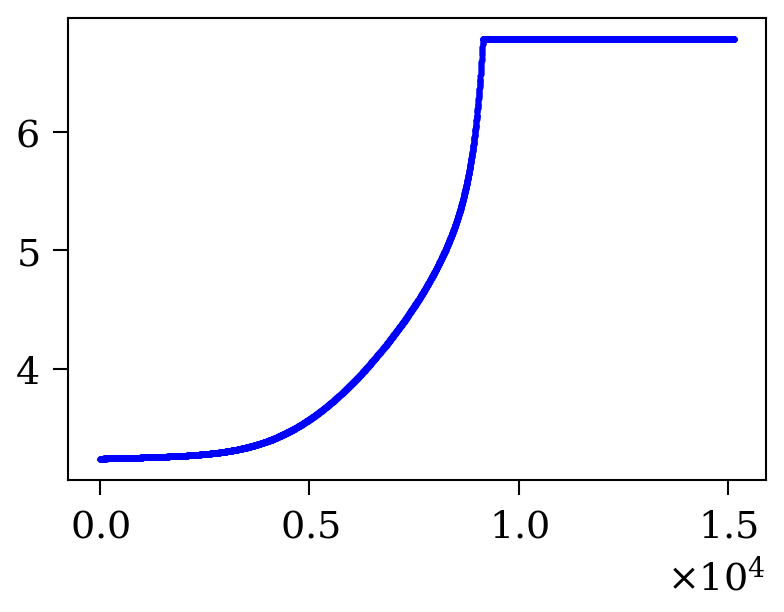

In [7]:
fig, ax = plt.subplots()
first_epoch = sweep.stream_arrays[0].epoch
for sa in sweep.stream_arrays:
    ax.plot(sa.epoch - first_epoch, sa.state.temperature.package, '.b')


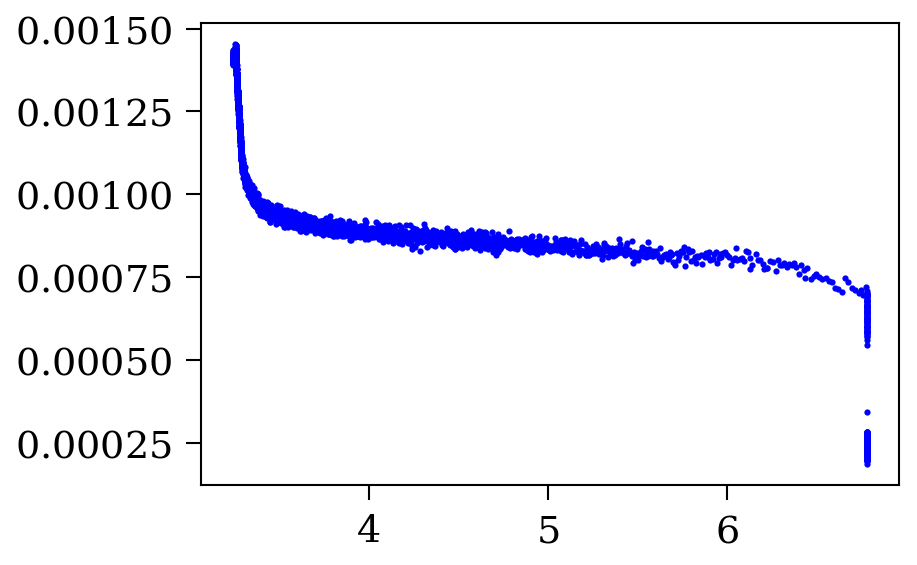

In [8]:
index = 0
fig, ax = plt.subplots()
first_epoch = sweep.stream_arrays[0].epoch
for sa in sweep.stream_arrays:
    ax.plot(sa.state.temperature.package, np.abs(sa[index].s21_point), '.b')